In [78]:
# Simple_Image Classifier

In [2]:
import tensorflow as tf

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
#lets defined input shape for our model
input_shape = [28,28]

In [8]:
#Lets see what is in this X-train[0]

In [9]:
import matplotlib.pyplot as plt

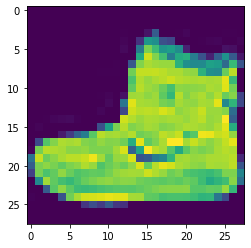

In [10]:
plt.imshow(X_train[0])

In [11]:
print(y_train[0])

9


In [12]:
#Lets create Valdiation set, also since we are going to train them with Gradient descent, we must scale the input feature

In [13]:
X_validation_set = X_train[:5000]/255.0
X_train_rest = X_train[5000:]/255.0

In [14]:
y_validation_set = y_train[:5000]
y_train_rest = y_train[5000:]

In [15]:
# Extracted over internet, the class names for fashion mnist data set
class_names =['T-shirt/top',
'Trouser/pants',
'Pullover shirt',
'Dress',
'Coat',
'Sandal',
'Shirt',
'Sneaker',
'Bag',
'Ankle boot']

In [16]:
print(y_train[0]), print(class_names[y_train[0]])

9
Ankle boot


(None, None)

In [17]:
X_train_rest.shape

(55000, 28, 28)

In [18]:
# lets create a model with sequential API

In [19]:
our_model = tf.keras.models.Sequential()

In [20]:
#our_model.add(tf.keras.layers.Flatten(input_shape=X_train.shape))

our_model.add(tf.keras.layers.Flatten(input_shape=[28,28]))

In [21]:
our_model.add(tf.keras.layers.Dense(300, activation=tf.keras.activations.relu)) # we can also write activation='relu'

In [22]:
our_model.add(tf.keras.layers.Dense(100, activation=tf.keras.activations.relu))

In [23]:
our_model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax))

In [24]:
our_model.layers #Lets see layers

In [25]:
our_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Now the number of parameters for first dense layer after first input shape of 28 * 28 i.e. 784 is
# 784 * 300 (size is actually 300* 1) + 300 (value of bias terms)
# 235500

# Parameters can be access as below
 
our_model.layers[1].count_params()

235500

In [27]:
weights, biases = our_model.layers[1].get_weights()

In [28]:
weights.shape

(784, 300)

In [29]:
biases.shape

(300,)

In [30]:
# Compiling the model

In [31]:
our_model.compile(

    loss=tf.keras.losses.sparse_categorical_crossentropy, # this paremeter can be passed as 'sparse_categorical_crossentropy'
    optimizer = tf.keras.optimizers.SGD(), # This parameter can be passed as 'sgd'
    metrics= [tf.keras.metrics.sparse_categorical_accuracy] # this param can be passed as 'accuracy', this is related to loss name
)

In [32]:
# our_model.compile(

#     loss='sparse_categorical_crossentropy', # this paremeter can be passed as 'sparse_categorical_crossentropy'
#     optimizer = 'sgd', # This parameter can be passed as 'sgd'
#     metrics= ['accuracy'] # this param can be passed as 'accuracy', this is related to loss name
# )

In [33]:
# since we have sparse labels i.e. ther is just a target class index from 0 to 9 and classes are exclusive
# If we had one target probability per class for each instance (like one-hot vector) then we would have used 'categorical_crossentropy' loss
# If we had binary classification, then we would have use 'binary_crossentropy' with 'sigmoid' activation and as usuall 'softmax' in output layer

In [34]:
type(X_train_rest)

numpy.ndarray

In [35]:
# Code to save the model after every 5 epochs
import os
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "image_classifier_model/chkpt-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    period=5)

# Save the weights using the `checkpoint_path` format
our_model.save_weights(checkpoint_path.format(epoch=0))




In [46]:
# Train the model with the new callback
history = our_model.fit(
    X_train_rest, 
    y_train_rest, 
    epochs=30, 
    callbacks=[cp_callback], 
    validation_data=(X_validation_set,y_validation_set),
    verbose=1
    )

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 133us/sample - loss: 0.2239 - sparse_categorical_accuracy: 0.9193 - val_loss: 0.2963 - val_sparse_categorical_accuracy: 0.8918
Epoch 2/30
55000/55000 [==============================] - 7s 133us/sample - loss: 0.2192 - sparse_categorical_accuracy: 0.9211 - val_loss: 0.2927 - val_sparse_categorical_accuracy: 0.8962
Epoch 3/30
55000/55000 [==============================] - 6s 113us/sample - loss: 0.2158 - sparse_categorical_accuracy: 0.9227 - val_loss: 0.2993 - val_sparse_categorical_accuracy: 0.8928
Epoch 4/30
55000/55000 [==============================] - 7s 127us/sample - loss: 0.2124 - sparse_categorical_accuracy: 0.9242 - val_loss: 0.2927 - val_sparse_categorical_accuracy: 0.8964
Epoch 5/30
54944/55000 [============================>.] - ETA: 0s - loss: 0.2097 - sparse_categorical_accuracy: 0.9249
Epoch 00005: saving model to image_classifier_model/chkpt-0005.ckpt
55000/55000 

In [37]:
#our_model.save('Fashion_mnist.ckpkt')

In [47]:


history.history


{'loss': [0.22394160555276005,
  0.21921020165356722,
  0.2157866671741009,
  0.2123804490371184,
  0.2096473979733207,
  0.2051697935776277,
  0.20247002404494718,
  0.19897105694250627,
  0.19682701212926346,
  0.19378365909728137,
  0.1901323385783217,
  0.1870117997505448,
  0.18402574882507325,
  0.1817381173285571,
  0.1777769935499538,
  0.1764220321947878,
  0.1733975216518749,
  0.17159511724818838,
  0.16744381462877447,
  0.16552449474334716,
  0.16260854427977042,
  0.15984789203730496,
  0.1577482907078483,
  0.15463479585755954,
  0.15179876726540653,
  0.15084261340444738,
  0.1480617853077975,
  0.14602222508192061,
  0.1443305650678548,
  0.1404548089227893],
 'sparse_categorical_accuracy': [0.9193091,
  0.92114544,
  0.92274547,
  0.9241818,
  0.92489094,
  0.9270727,
  0.9272182,
  0.9285273,
  0.9298,
  0.9304909,
  0.9317273,
  0.9326909,
  0.9344909,
  0.9350909,
  0.93561816,
  0.9366909,
  0.9382182,
  0.9391091,
  0.9401091,
  0.94150907,
  0.94247276,
  0.9432

In [48]:
import pandas as pd

In [49]:
history_data = pd.DataFrame(history.history)

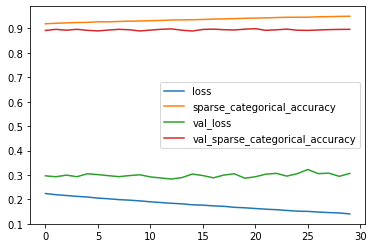

In [50]:
history_data.plot()

In [51]:
our_model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 79us/sample - loss: 81.0236 - sparse_categorical_accuracy: 0.8474


[81.0235576761851, 0.8474]

In [63]:
# Lets predict
# lets select random
import numpy as np
X_to_pred = np.array([X_test[56], X_test[64], X_test[95]])


In [66]:
our_model.predict(X_to_pred)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [68]:
our_model.predict_classes(X_to_pred)

array([8, 1, 8], dtype=int64)

In [72]:
np.array(class_names)[our_model.predict_classes(X_to_pred)]

array(['Bag', 'Trouser/pants', 'Bag'], dtype='<U14')

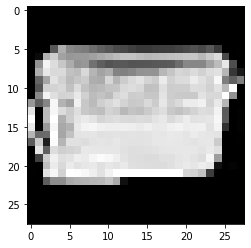

In [75]:
plt.imshow(X_to_pred[0], cmap='gray')

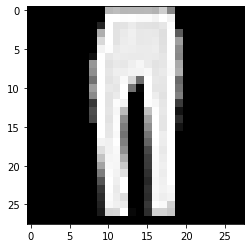

In [76]:
plt.imshow(X_to_pred[1], cmap='gray')

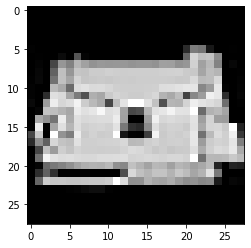

In [77]:
plt.imshow(X_to_pred[2], cmap='gray')